In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import random

In [2]:
# Cấu hình
h = {"image_size": 224}
base_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
normal_dir = os.path.join(base_dir, "NORMAL")
pneumonia_dir = os.path.join(base_dir, "PNEUMONIA")

normal_files = os.listdir(normal_dir)
pneumonia_files = os.listdir(pneumonia_dir)

random.seed(42)
random.shuffle(normal_files)
random.shuffle(pneumonia_files)

augmentation = transforms.Compose([
    # transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(30),  # Randomly rotate the image within a range of (-30, 30) degrees
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip the image horizontally with 50% probability
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.RandomResizedCrop(h["image_size"], scale=(0.7, 1.0)),
    transforms.RandomAffine(degrees=0, shear=10),
    transforms.Resize(size=(h["image_size"], h["image_size"])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# Hàm unnormalize để hiển thị
def unnormalize(tensor_img):
    img = tensor_img.clone()
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    return transforms.ToPILImage()(img)

group_A = []  # NORMAL - nguyên bản
group_B = []  # PNEUMONIA - nguyên bản
group_C = []  # NORMAL - đã augment
group_D = []  # PNEUMONIA - đã augment

# Load 10 ảnh nguyên bản mỗi nhóm
for i in range(10):
    img_A = Image.open(os.path.join(normal_dir, normal_files[i])).convert("RGB")
    group_A.append(img_A)

    img_B = Image.open(os.path.join(pneumonia_dir, pneumonia_files[i])).convert("RGB")
    group_B.append(img_B)

# Load và augment 10 ảnh cho mỗi nhóm
for i in range(10):
    img_C = Image.open(os.path.join(normal_dir, normal_files[10 + i])).convert("RGB")
    tensor_C = augmentation(img_C)
    group_C.append(unnormalize(tensor_C))

    img_D = Image.open(os.path.join(pneumonia_dir, pneumonia_files[10 + i])).convert("RGB")
    tensor_D = augmentation(img_D)
    group_D.append(unnormalize(tensor_D))



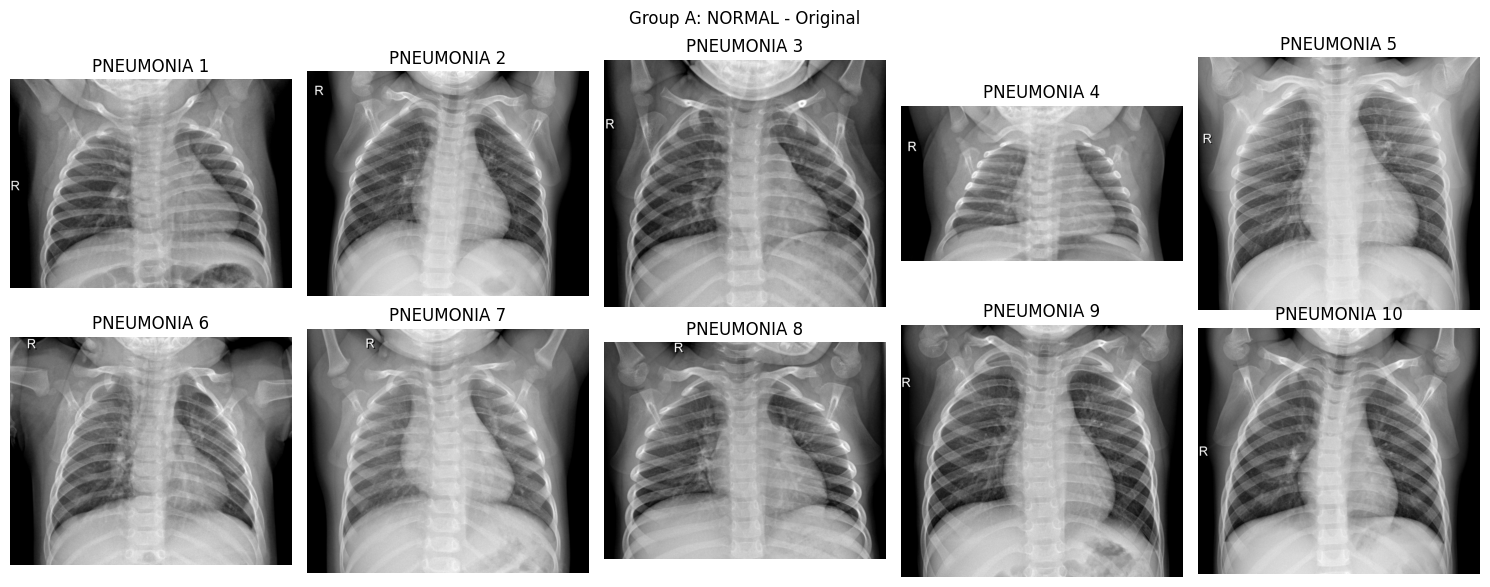

In [3]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(group_A[i])
    plt.title(f"PNEUMONIA {i+1}")
    plt.axis('off')
plt.suptitle("Group A: NORMAL - Original")
plt.tight_layout()
plt.show()

Đây là ảnh phổi của người bình thường không bị nhiễm virut
- Hình ảnh chụp rõ nét, kích thước phổi bình thường
- Cấu trúc phổi cân đối 2 bên.
- Màu xám nhẹ đều.
- Không có mảng trắng hoặc bóng mờ.

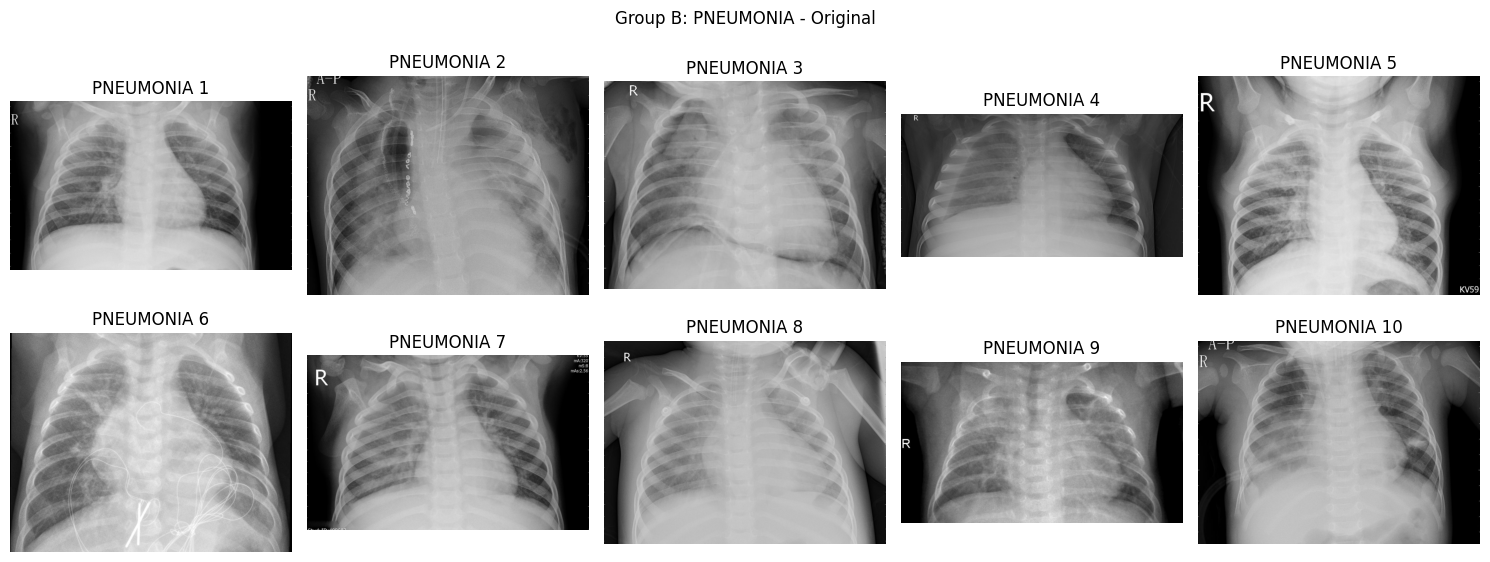

In [4]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(group_B[i])
    plt.title(f"PNEUMONIA {i+1}")
    plt.axis('off')
plt.suptitle("Group B: PNEUMONIA - Original")
plt.tight_layout()
plt.show()

Đây là hình ảnh phổi của người bị nhiếm bệnh:
- Kích thước phổi lớn bất thường
- Một bên phổi có vùng trắng bất thường (dấu hiệu viêm).
- Màu trắng lan tỏa hoặc cục bộ, không đồng đều.
- Có thể thấy phổi bên bị mờ rõ rệt hơn bên kia.

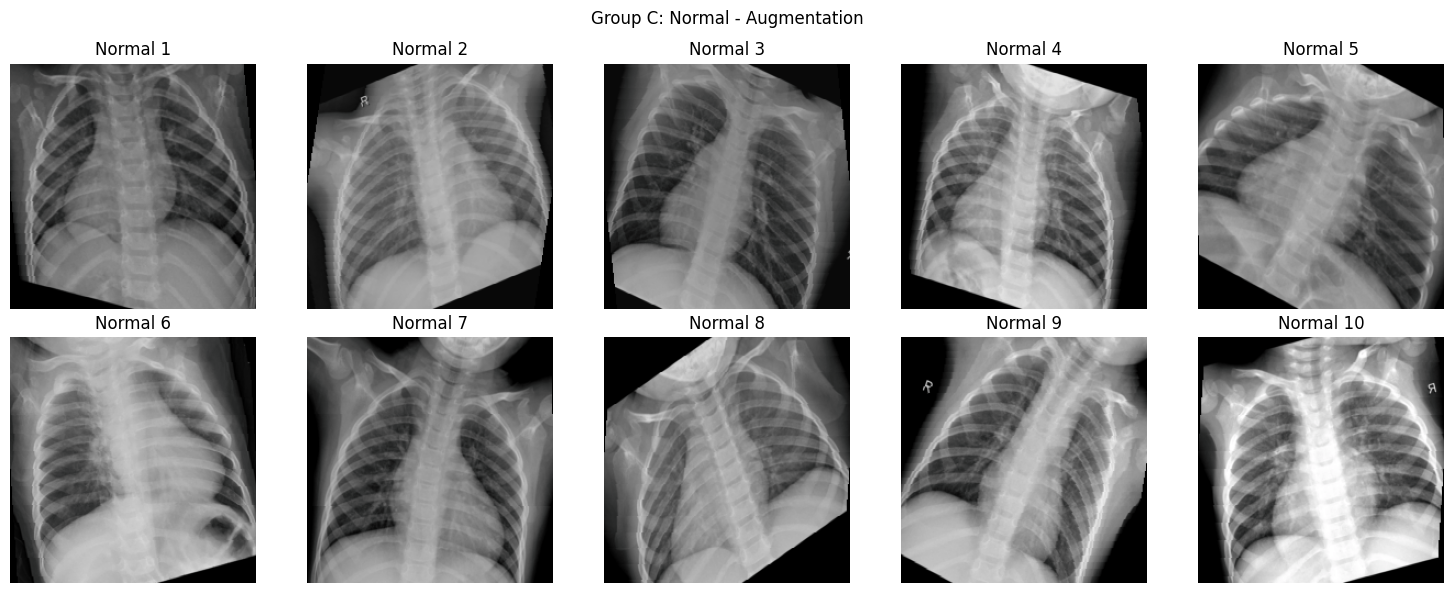

In [5]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(group_C[i])
    plt.title(f"Normal {i+1}")
    plt.axis('off')
plt.suptitle("Group C: Normal - Augmentation")
plt.tight_layout()
plt.show()

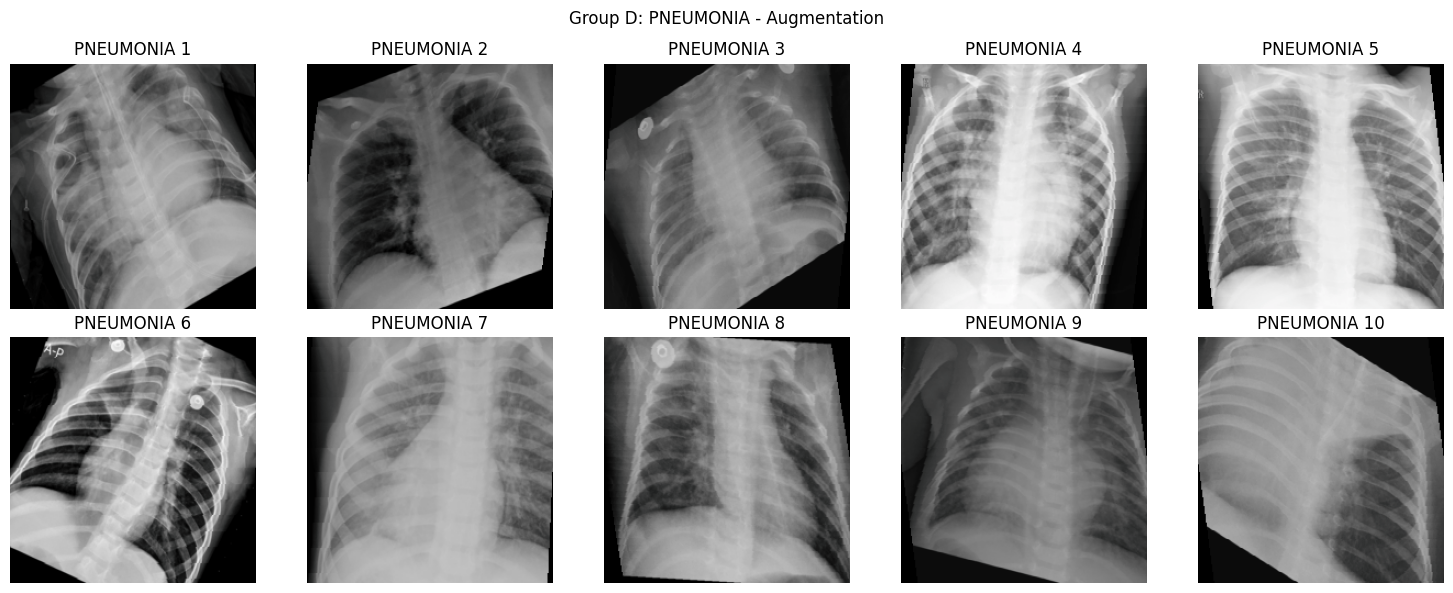

In [6]:
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(group_D[i])
    plt.title(f"PNEUMONIA {i+1}")
    plt.axis('off')
plt.suptitle("Group D: PNEUMONIA - Augmentation")
plt.tight_layout()
plt.show()

In [7]:
def get_image_paths(base_root, subset="train"):
    base_dir = os.path.join(base_root, subset)
    normal_dir = os.path.join(base_dir, "NORMAL")
    pneumonia_dir = os.path.join(base_dir, "PNEUMONIA")

    normal_files = os.listdir(normal_dir)
    pneumonia_files = os.listdir(pneumonia_dir)

    return normal_dir, pneumonia_dir, normal_files, pneumonia_files

def plot_image_counts(normal_files, pneumonia_files, subset_name):
    labels = ['NORMAL', 'PNEUMONIA']
    counts = [len(normal_files), len(pneumonia_files)]

    plt.figure(figsize=(6, 5))
    plt.bar(labels, counts, color=["skyblue", "salmon"])
    plt.title(f"Số lượng ảnh trong tập {subset_name}")
    plt.xlabel("Loại ảnh")
    plt.ylabel("Số lượng ảnh")
    plt.grid(axis='y')
    plt.show()

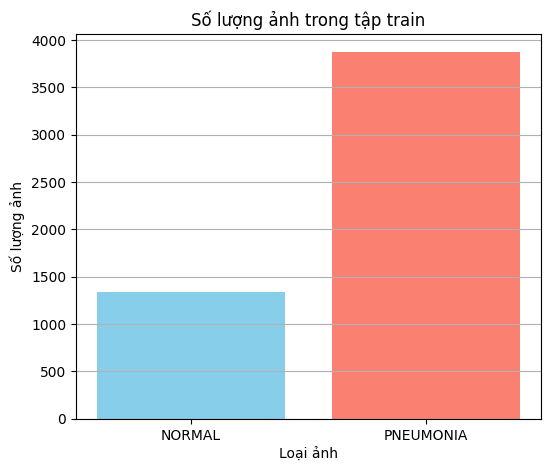

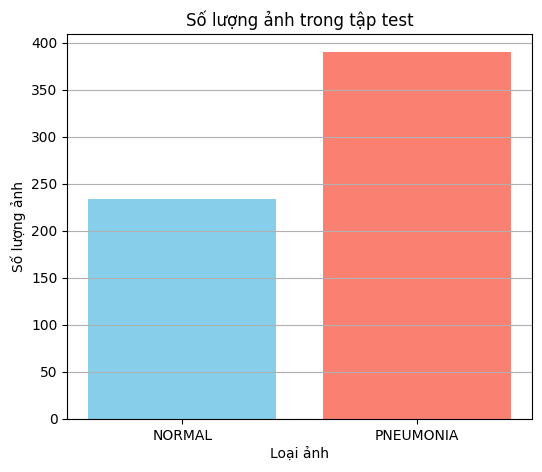

In [8]:
base_root = "/kaggle/input/chest-xray-pneumonia/chest_xray"

for subset in ["train", "test"]:
    normal_dir, pneumonia_dir, normal_files, pneumonia_files = get_image_paths(base_root, subset=subset)
    plot_image_counts(normal_files, pneumonia_files, subset)